In [ ]:
!pip install matplotlib deap
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
num_locations = 10
locations = [(random.randint(0,100), random.randint(0,100)) for _ in range(num_locations)]
depot = (50,50)
num_vehicles = 3

In [ ]:

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(1, num_locations), num_locations -1)  # Exclude depot

def create_individual():
    individual = []
    indices = toolbox.indices()
    random.shuffle(indices)
    split_points = sorted(random.sample(range(1, num_locations - 1), num_vehicles - 1))
    splits = [0] + split_points + [num_locations-1]

    for i in range(num_vehicles):
      vehicle_route = [depot] + [locations[j] for j in indices[splits[i] : splits[i+1]]] + [depot]
      individual.append(vehicle_route)
    return individual

toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# prompt: # TASK 5 and 6
# def evalVRP(individual):
#     # TODO: Task 5 - Write the fitness evaluation function
#     #              - Return (total distance, standard deviation)
# #TASK 6 - Register the evaluate function in the toolbox

def distance(city1, city2):
    return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

def evalVRP(individual):
    total_distance = 0
    distances = []
    for route in individual:
        route_distance = 0
        for i in range(len(route) - 1):
            route_distance += distance(route[i], route[i+1])
        total_distance += route_distance
        distances.append(route_distance)

    std_dev = np.std(distances)
    return total_distance, std_dev

toolbox.register("evaluate", evalVRP)

In [ ]:
# prompt: # TASK 5 and 6
# def evalVRP(individual):
#     # TODO: Task 5 - Write the fitness evaluation function
#     #              - Return (total distance, standard deviation)
# #TASK 6 - Register the evaluate function in the toolbox

def evalVRP(individual):
    total_distance = 0
    distances = []
    for route in individual:
        route_distance = 0
        for i in range(len(route) - 1):
            route_distance += distance(route[i], route[i+1])
        total_distance += route_distance
        distances.append(route_distance)

    std_dev = np.std(distances)
    return total_distance, std_dev

toolbox.register("evaluate", evalVRP)

In [ ]:

import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# ... (previous code)

def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        vehicle_distance = 0
        for k in range(len(vehicle_route) - 1):
            vehicle_distance += distance(vehicle_route[k], vehicle_route[k+1])
        # Calculate total distance traveled by this vehicle
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [ ]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [ ]:
import matplotlib.pyplot as plt

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure(figsize=(8, 6))
    for i, route in enumerate(individual):
        x = [location[0] for location in route]
        y = [location[1] for location in route]
        plt.plot(x, y, marker='o', label=f"Vehicle {i+1}")

    plt.scatter(depot[0], depot[1], marker='s', color='red', label='Depot')
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

gen	nevals	avg    	min    
0  	300   	361.492	5.28737
1  	220   	342.696	1.39288
2  	240   	336.384	0.829328
3  	229   	330.067	1.55667 
4  	228   	326.624	3.8268  
5  	218   	321.624	1.02969 
6  	220   	314.657	4.01171 
7  	232   	304.68 	4.01171 
8  	223   	295.284	1.0919  
9  	219   	282.614	2.30401 
10 	251   	279.107	5.00462 
11 	221   	265.407	5.00462 
12 	221   	255.452	4.28562 
13 	212   	252.739	5.00462 
14 	216   	253.491	9.11978 
15 	222   	253.101	5.77057 
16 	229   	253.971	9.56005 
17 	230   	254.709	8.19789 
18 	228   	257.502	9.24123 
19 	244   	256.019	17.3125 
20 	223   	251.822	14.8574 
21 	222   	253.629	14.7095 
22 	223   	251.156	11.2458 
23 	218   	250.054	19.3269 
24 	240   	250.922	10.0423 
25 	227   	251.355	7.7214  
26 	235   	249.452	18.642  
27 	235   	251.148	14.8574 
28 	235   	251.433	17.3641 
29 	240   	253.043	20.9669 
30 	235   	251.218	17.3641 
31 	232   	250.583	14.8574 
32 	229   	250.732	18.642  
33 	243   	252.347	14.8574 
34 	214   	251.788	19.3

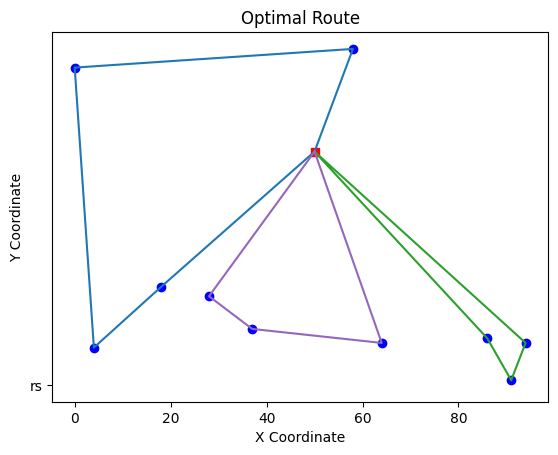

Best Individual: [6, 1, 0, 9, 8, 5, 7, 3, 2, 4]
Best Fitness: (456.6720249052345, 36.9671071906157)


In [ ]:


def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual
    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)
    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    pop, stats, hof = main()
    print("Best Individual:", hof[0])
    print("Best Fitness:", hof[0].fitness.values)